In [1]:
import sys
print(sys.version)

3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:14:58) [MSC v.1929 64 bit (AMD64)]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import gymnasium as gym
import tankEnvV1

env = gym.envs.make('crudeTanksEnv-v1')

C:\ProgramData\Anaconda3\envs\rl\lib\site-packages\gymnasium\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (2, 10)
  logger.warn(
C:\ProgramData\Anaconda3\envs\rl\lib\site-packages\gymnasium\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (2, 5)
  logger.warn(
C:\ProgramData\Anaconda3\envs\rl\lib\site-packages\gymnasium\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vec

In [3]:
state0, data = env.reset()
action = env.action_space.sample()
obs, reward, done, truncated, info = env.step(action)
action, data['actionAvail'][action]

C:\ProgramData\Anaconda3\envs\rl\lib\site-packages\gymnasium\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


(78, False)

720 242.6776122229942


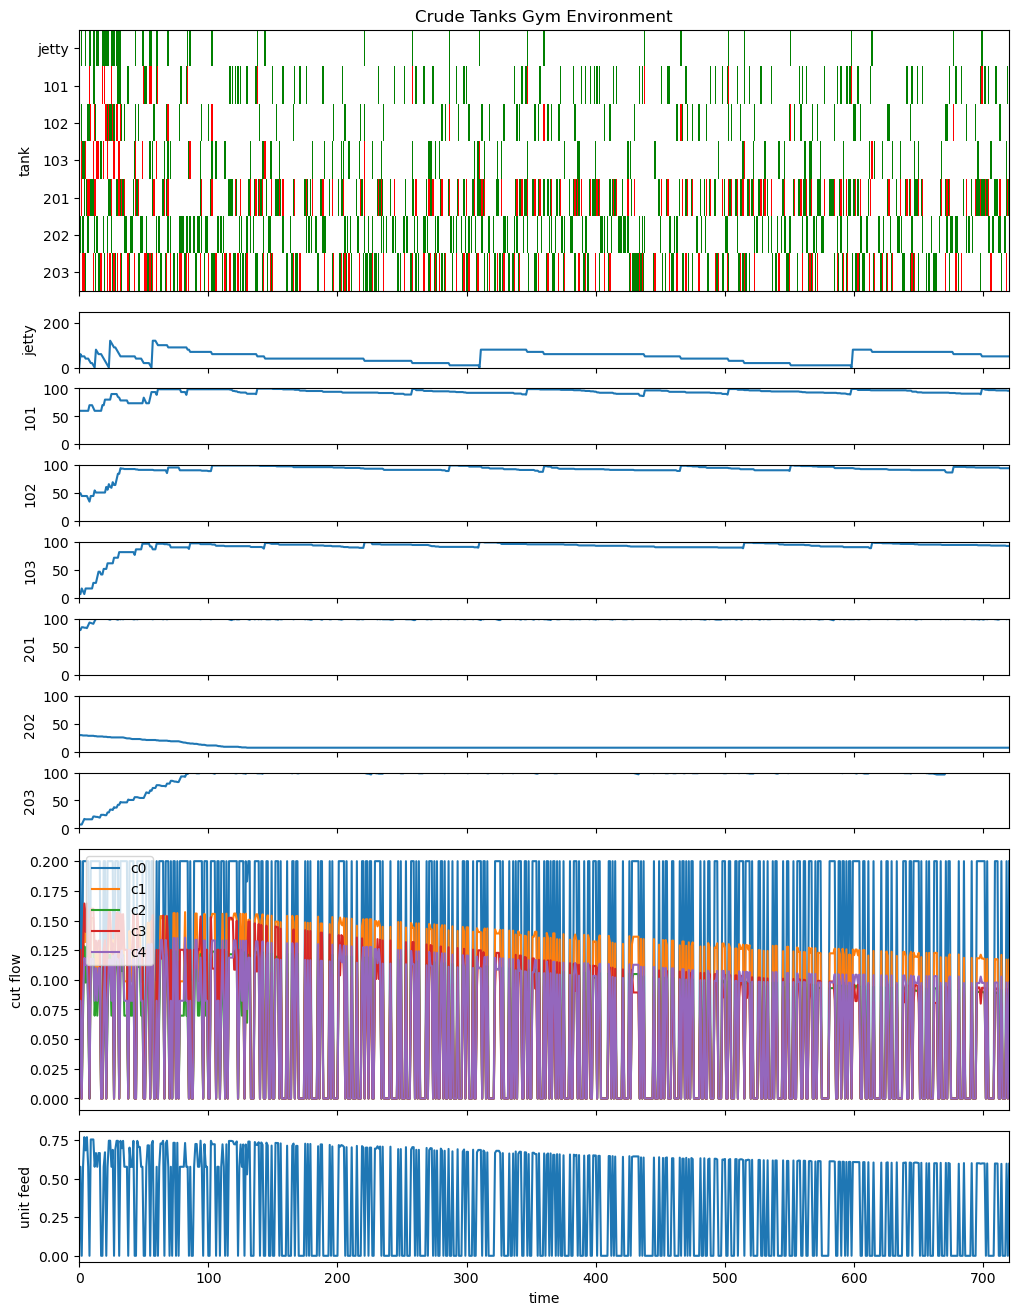

In [4]:
#env = gym.wrappers.FlattenObservation(env)
state0, data = env.reset(seed=200560)
actionAvail = data['actionAvail']
rewardList = []
totalReward = 0
done = False
t = 0
while not done:
    action = env.action_space.sample()
    if actionAvail[action]: 
        obs, reward, done, _, info = env.step(action)
        rewardList.append(reward)
        actionAvail = info['actionAvail']
        totalReward += reward
        t += 1
print(t, totalReward)
env.S.render()

0.4960313269759721

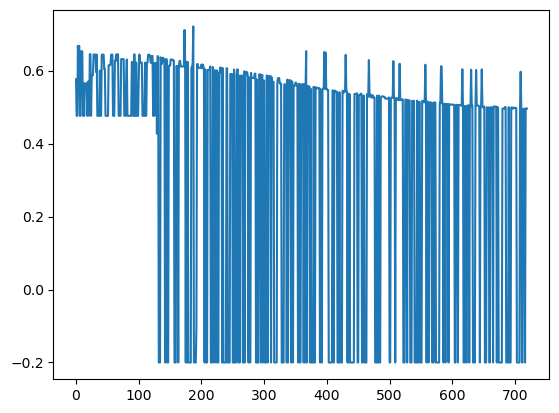

In [5]:
plt.plot(rewardList)
env.S.reward